In [1]:
import numpy as np

import matplotlib.pyplot as plt


In [2]:
x=np.linspace(-1,1,100)
signal=2+x+2*x*x

noise=np.random.normal(0,0.1,100)
y=signal+noise


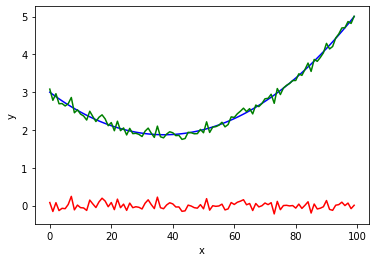

In [10]:
plt.plot(signal,'b')
plt.plot(y,'g')
plt.plot(noise,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
x_train=x[:80]
y_train=y[:80]


print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)

shape of x_train (80,)
shape of y_train (80,)


(80, 4)
Train RMSE 0.85
Test RMSE 0.46


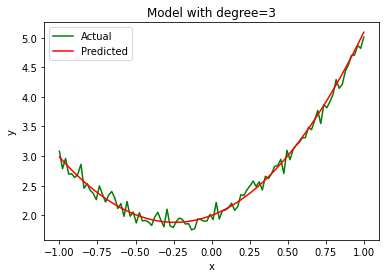

In [32]:
# OLS based regression from scratch

def create_model(x_train,degree):
    degree+=1
    x_train=np.column_stack([np.power(x_train,i) for i in range(0,degree)])
    print(x_train.shape)
    model=np.dot(np.dot(np.linalg.inv(np.dot(x_train.transpose(),x_train)),x_train.transpose()),y_train)
    plt.plot(x,y,'g')
    plt.xlabel('x')
    plt.ylabel('y')
    predicted=np.dot(model,[np.power(x,i) for i in range(0,degree)])
    plt.plot(x,predicted,'r')
    plt.legend(['Actual','Predicted'],loc=2)
    plt.title('Model with degree=3')
    train_rmse1=np.sqrt(np.sum(np.dot(y[0:80]-predicted[0:80], y_train-predicted[0:80])))
    test_rmse1=np.sqrt(np.sum(np.dot(y[80:]-predicted[80:], y[80:]-predicted[80:])))

    print('Train RMSE',round(train_rmse1,2))

    print('Test RMSE',round(test_rmse1,2))
    plt.show()

create_model(x_train,3)

In [31]:
x_train.shape

(80,)

In [14]:
y

array([3.08190132, 2.78553385, 2.96063539, 2.69500862, 2.70011697,
       2.63643672, 2.69741323, 2.86070926, 2.45567953, 2.5348563 ,
       2.42207765, 2.37118868, 2.26346946, 2.49668253, 2.35610335,
       2.22419963, 2.33759702, 2.4018648 , 2.29533549, 2.11439938,
       2.19707405, 1.98134815, 2.23331285, 1.9831037 , 2.05522083,
       1.86968795, 2.04328325, 1.90444418, 1.91367147, 1.88438792,
       1.8278302 , 1.96970641, 2.05033352, 1.91719767, 1.80540137,
       2.10332981, 1.82124471, 1.79332023, 1.89272086, 1.95382225,
       1.92774448, 1.85163687, 1.85950224, 1.75272211, 1.77550944,
       1.93923444, 1.92810568, 1.90073158, 1.90414176, 2.01630365,
       1.92680217, 2.21675217, 1.93631552, 2.07788846, 2.08908093,
       2.12663809, 2.20459769, 2.08391279, 2.14490294, 2.34733681,
       2.33303194, 2.42957295, 2.49819182, 2.57784271, 2.48743605,
       2.56554925, 2.42641236, 2.65947843, 2.61946488, 2.70182084,
       2.82649356, 2.83812869, 2.94554842, 2.70635115, 3.09720

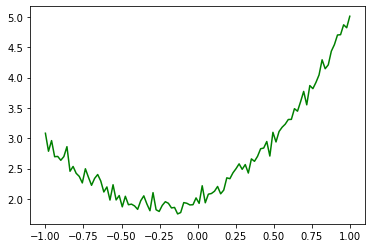

In [16]:
plt.plot(x,y,'g')

In [41]:
# understanding regularization

import matplotlib.pyplot as plt
import  numpy as np

np.random.seed(20)

x=np.linspace(-1,1,100)
signal=2+x+2*x*x

noise=np.random.normal(0,0.1,100)
y=signal+noise
x_train=x[:80]
y_train=y[:80]

train_rmse=[]
test_rmse=[]

degree=80

lambda_reg_vals=np.linspace(0.01,0.99,100)

for lambda_reg in lambda_reg_vals:
    x_train=np.column_stack([np.power(x_train,i) for i in range(0,degree) ])
    #model=np.dot(np.dot(np.linalg.inv(np.dot(x_train.transpose(),x_train)+lambda_reg*np.identity(degree)), x_train.transpose()),y_train)
    model = np.dot(np.dot(np.linalg.inv(np.dot(x_train.transpose(),x_train) + lambda_reg * np.identity(degree)),x_train.transpose()),y_train)
    predicted=np.dot(model,[np.power(x,i) for i in range(0,degree)])
    train_rmse.append(np.sqrt(np.sum(np.dot(y[:80]-predicted[:80],y_train-predicted[:80]))))
    test_rmse.append(np.sqrt(np.sum(np.dot(y[80:]-predicted[80:],y[80:]-predicted[80:]))))


plt.plot(lambda_reg_vals,train_rmse)
plt.plot(lambda_reg_vals,test_rmse)


ValueError: operands could not be broadcast together with shapes (6400,6400) (80,80) 